In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Data paths
train_dir = 'training'
test_dir = 'testing'

# Image dimensions
img_width, img_height = 150, 150


In [4]:
# Data generators for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)


Found 588 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [ ]:
# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model


In [5]:
# Specify input shape (e.g., image dimensions)
input_shape = (img_width, img_height, 3)  # Example input shape (height, width, channels)

# Create the CNN model
model = create_cnn_model(input_shape)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Adjusting the learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=test_generator, validation_steps=len(test_generator))

# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

NameError: name 'create_cnn_model' is not defined

In [1]:
import warnings

# Suppress TensorFlow deprecation warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your existing code
# ...

# Remove the warning suppression after the problematic code if needed
warnings.resetwarnings()

In [2]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import os

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a model with the desired output layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)

# Directory paths for train and test sets
train_dir = 'preprocessed_dataset_3/training'
test_dir = 'preprocessed_dataset_3/testing'

# Function to preprocess and extract features from images
def extract_features_resnet(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Get image paths and labels for train set
X_train = []
y_train = []

for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    for image_file in os.listdir(label_path):
        image_path = os.path.join(label_path, image_file)
        X_train.append(image_path)
        y_train.append(label)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Apply the feature extraction function to each image in the training set
X_train_features_resnet = np.array([extract_features_resnet(image) for image in X_train])

# Apply the feature extraction function to each image in the testing set
X_test_features_resnet = np.array([extract_features_resnet(image) for image in X_test])

# ... (continue with the rest of your SVM model code)

# Hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_features_resnet, y_train)
best_params = grid_search.best_params_

# Create and train the SVM model with the best parameters
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_features_resnet, y_train)

# Apply the feature extraction function to each image in the testing set
X_test_features_resnet = np.array([extract_features_resnet(image) for image in X_test])

# Make predictions on the test set
y_pred_best = best_svm_model.predict(X_test_features_resnet)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

print("Best Parameters:", best_params)
print("Best Model Accuracy:", accuracy_best)
print("Classification Report for Best Model:\n", report_best)





1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 318ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 187ms/step
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Model Accuracy: 0.9150743099787686
Classification Report for Best Model:
                  precision    recall  f1-score   support

     Alternaria       0.89      0.86      0.88        95
    Anthracnose       1.00      0.97      0.99        73
Black Mould Rot       0.74      0.83      0.78        76
        Healthy       0.98      0.99      0.99       125
   Stem and Rot       0.94      0.89      0.91       102

       accuracy                           0.92       471
      macro avg       0.91      0.91      0.91       471
   weighted avg       0.92      0.92      0.92       471



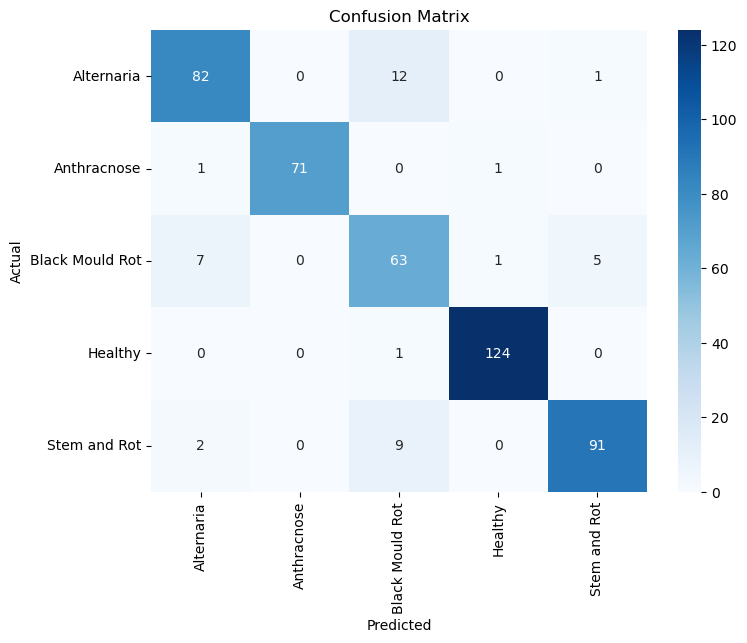

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your class names
class_names = ['Alternaria', 'Anthracnose', 'Black Mould Rot', 'Healthy', 'Stem and Rot']  # Update with your actual class names

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


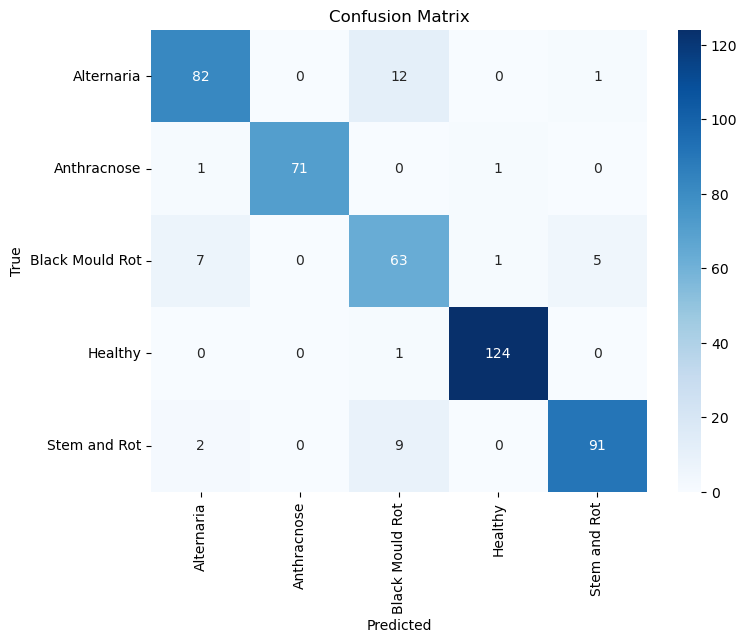

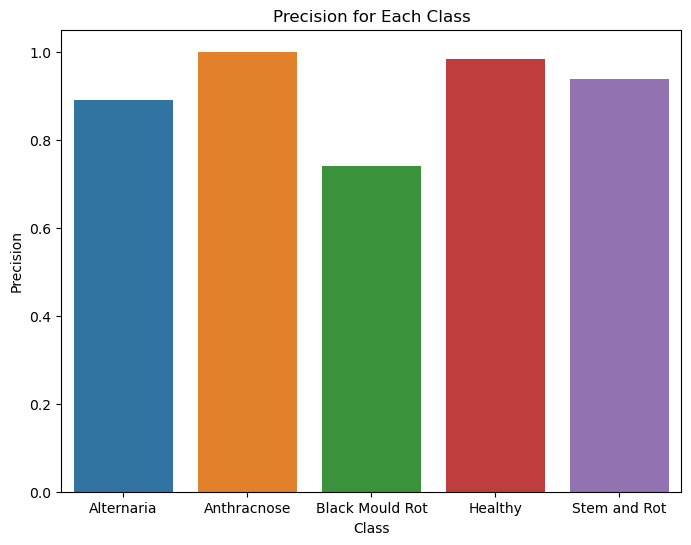

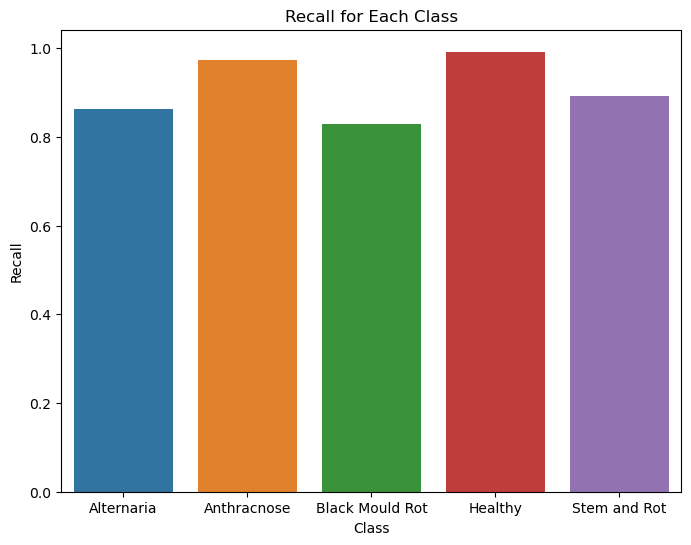

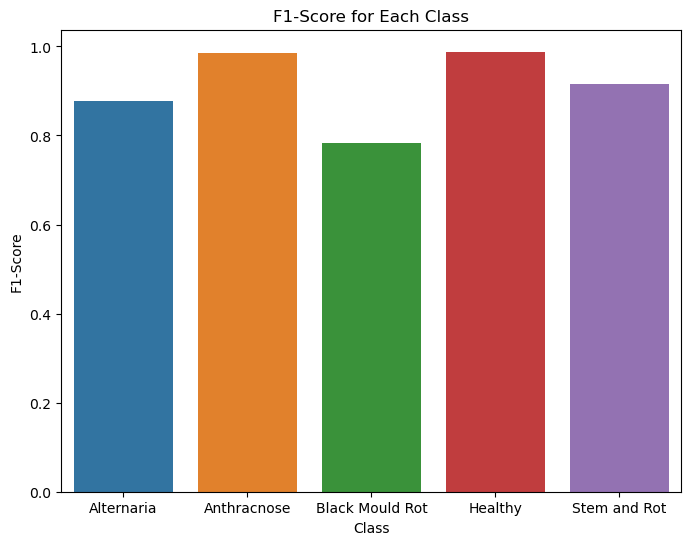

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Define labels based on your classes
labels = ['Alternaria', 'Anthracnose', 'Black Mould Rot', 'Healthy', 'Stem and Rot']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plot other relevant graphs
# Note: You may need to modify these based on your specific needs
# For example, you can plot precision, recall, and F1-score for each class.

# Plot precision
precision = precision_score(y_test, y_pred_best, average=None)
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=precision)
plt.title("Precision for Each Class")
plt.xlabel("Class")
plt.ylabel("Precision")
plt.show()

# Plot recall
recall = recall_score(y_test, y_pred_best, average=None)
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=recall)
plt.title("Recall for Each Class")
plt.xlabel("Class")
plt.ylabel("Recall")
plt.show()

# Plot F1-score
f1 = f1_score(y_test, y_pred_best, average=None)
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=f1)
plt.title("F1-Score for Each Class")
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.show()
